In [1]:
import pickle

pickle_file = '-images.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    X = save['X']
    y = save['y']
    del save  # hint to help gc free up memory
    print('Training set', X.shape, y.shape)

('Training set', (16032, 32, 32), (16032, 1))


In [2]:
# Add additional imports
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import ModelCheckpoint

from keras.datasets import mnist

print "using ordering:", K.image_dim_ordering()

Using Theano backend.


using ordering: th


In [3]:
# number of classes
num_classes = np.max(y) + 1 # number of categories
print "number of classes:", num_classes

# image dimensions
img_rows, img_cols = X.shape[1],  X.shape[2]

if K.image_dim_ordering() == 'th':
    X = X.reshape(X.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

y_ohe = np_utils.to_categorical(y, num_classes)

print X.shape
print y_ohe.shape

number of classes: 3
(16032, 1, 32, 32)
(16032, 3)


(32, 32)
[ 1.  0.  0.]


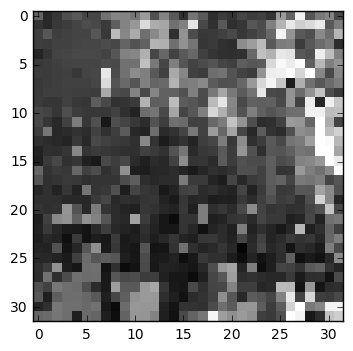

In [4]:
# Plot to make sure we have imported correctly..
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

img_num = 0

if K.image_dim_ordering() == 'th':
    img = X[img_num][0,:,:]
else:
    img = X[img_num][:,:,0]

print img.shape
print y_ohe[img_num]
imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')

In [5]:
## Construct CNN

# model hyperparameters
batch_size = 32
nb_epoch = 10

# network architecture
patch_size_1 = 3
patch_size_2 = 3
patch_size_3 = 3
patch_size_4 = 3
patch_size_5 = 3

depth_1 = 64
depth_2 = 128
depth_3 = 128
depth_4 = 256
depth_5 = 256

pool_size = 2

num_hidden_1 = 512
num_hidden_2 = 1024

dropout = 0.25


##---------------------------
# create new Keras Sequential model
model = Sequential()

model.add(Convolution2D(depth_1, patch_size_1, patch_size_1,
                        border_mode='same',
                        input_shape=input_shape))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(depth_2, patch_size_2, patch_size_2,
                        border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(depth_3, patch_size_3, patch_size_3,
                        border_mode='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(pool_size, pool_size)))

model.add(Convolution2D(depth_4, patch_size_4, patch_size_4,
                        border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(depth_5, patch_size_5, patch_size_5,
                        border_mode='same'))
model.add(Activation('relu'))


model.add(Flatten())

model.add(Dense(num_hidden_1))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_hidden_2))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

print "Model Created"

##-------------------------------------------
# compile model
checkpoint_name = "-model.hdf5"
checkpointer = ModelCheckpoint(checkpoint_name, verbose=0, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

print "Compiled.."

Model Created
Compiled..


In [6]:
# Train Model
history = model.fit(X, y_ohe, validation_split=0.25, batch_size=batch_size, nb_epoch=nb_epoch,
          verbose=1, callbacks=[checkpointer])

Train on 12024 samples, validate on 4008 samples
Epoch 1/10
12024/12024 [==============================] - 349s - loss: 1.0991 - acc: 0.3305 - val_loss: 1.0991 - val_acc: 0.3318
Epoch 2/10
12024/12024 [==============================] - 365s - loss: 1.0922 - acc: 0.3684 - val_loss: 1.0813 - val_acc: 0.3905
Epoch 3/10
12024/12024 [==============================] - 355s - loss: 1.0711 - acc: 0.4141 - val_loss: 1.0549 - val_acc: 0.4334
Epoch 4/10
12024/12024 [==============================] - 340s - loss: 1.0563 - acc: 0.4390 - val_loss: 1.0426 - val_acc: 0.4528
Epoch 5/10
12024/12024 [==============================] - 392s - loss: 1.0439 - acc: 0.4561 - val_loss: 1.0515 - val_acc: 0.4394
Epoch 6/10
12024/12024 [==============================] - 385s - loss: 1.0305 - acc: 0.4726 - val_loss: 1.0347 - val_acc: 0.4656
Epoch 7/10
12024/12024 [==============================] - 394s - loss: 1.0141 - acc: 0.4883 - val_loss: 1.0384 - val_acc: 0.4638
Epoch 8/10
12024/12024 [========================